In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector, random_statevector

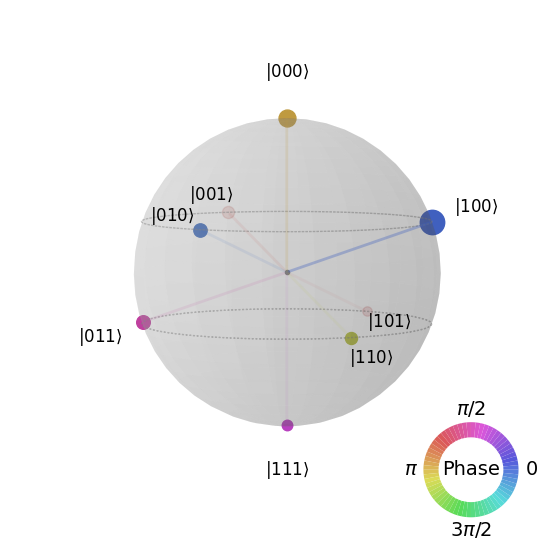

In [2]:
rand_sv = random_statevector(8)
plot_state_qsphere(rand_sv)

In [3]:
# rand_sv.data
qc = QuantumCircuit(3)
qc.initialize(rand_sv.data, [0,1,2])
qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                          ├
«     │                                                                                                                                                           │
«q_1: ┤1 Initialize(0.11351+0.38914j,0.23986+0.16612j,-0.11112-0.30066j,0.31783-0.075239j,-0.14013-0.56873j,0.19639+0.11323j,-0.024301+0.28707j,0.21354-0.13436j) ├
«     │                                                                                                                                                           │
«q_2: ┤2                                                                                                                                                          ├
«     └───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

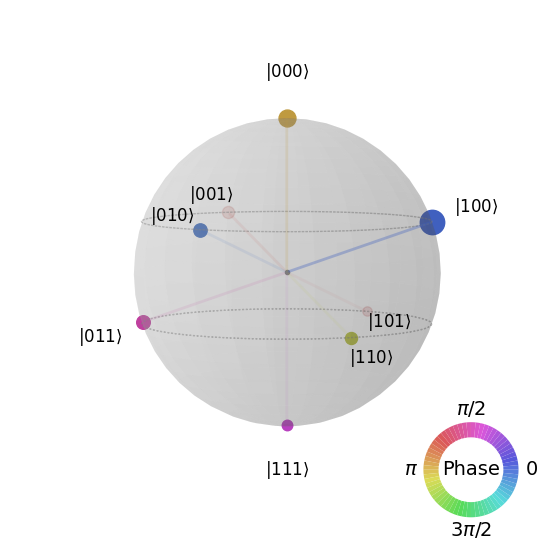

In [4]:
new_sv = Statevector.from_label('000')
# new_sv
evolved_sv = new_sv.evolve(qc)
plot_state_qsphere(evolved_sv)

In [5]:
evolved_sv.equiv(rand_sv)

True

In [6]:
import numpy as np
# Arbitrary state for CFD problem
x0 = np.random.rand(8)
x0 = x0 / np.linalg.norm(x0)
print(x0)
print(np.linalg.norm(x0))

[0.55876828 0.2852216  0.45614109 0.1472804  0.26517368 0.20124726
 0.49193379 0.15444755]
1.0


In [7]:
# convert state to Quantum Circuit
qc_arbitrary = QuantumCircuit(3)
qc_arbitrary.initialize(x0, [0,1,2])
qc_arbitrary.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                             ├
«     │                                                                              │
«q_1: ┤1 Initialize(0.55877,0.28522,0.45614,0.14728,0.26517,0.20125,0.49193,0.15445) ├
«     │                                                                              │
«q_2: ┤2                                                                             ├
«     └──────────────────────────────────────────────────────────────────────────────┘

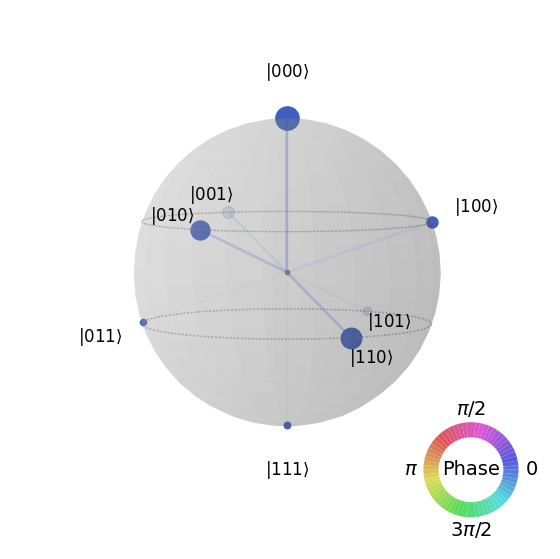

In [8]:
zero_state = Statevector.from_label('000')
# new_sv
new_state = zero_state.evolve(qc_arbitrary)
plot_state_qsphere(new_state)

In [9]:
from qiskit import transpile 
transpiled_qc = transpile(qc_arbitrary,
                        basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
print("Circuit depth: " + str(transpiled_qc.depth()))
transpiled_qc.draw()

Circuit depth: 26


global phase: π/2
     ┌────────┐┌────┐┌────────────┐┌────┐                               »
q_0: ┤ Rz(-π) ├┤ √X ├┤ Rz(2.2727) ├┤ √X ├───────────────────────────────»
     ├────────┤├────┤├────────────┤├────┤┌───┐┌────┐┌────────────┐┌────┐»
q_1: ┤ Rz(-π) ├┤ √X ├┤ Rz(1.4917) ├┤ √X ├┤ X ├┤ √X ├┤ Rz(2.7965) ├┤ √X ├»
     ├────────┤├────┤└┬──────────┬┘├────┤└─┬─┘└────┘└────────────┘└────┘»
q_2: ┤ Rz(-π) ├┤ √X ├─┤ Rz(1.82) ├─┤ √X ├──■────────────────────────────»
     └────────┘└────┘ └──────────┘ └────┘                               »
«                    ┌───┐┌────────┐┌────┐┌────────────┐┌────┐┌───┐┌────┐»
«q_0: ───────────────┤ X ├┤ Rz(-π) ├┤ √X ├┤ Rz(2.8893) ├┤ √X ├┤ X ├┤ √X ├»
«     ┌────────┐┌───┐└─┬─┘└────────┘└────┘└────────────┘└────┘└─┬─┘└────┘»
«q_1: ┤ Rz(-π) ├┤ X ├──■────────────────────────────────────────┼────────»
«     └────────┘└─┬─┘                                           │        »
«q_2: ────────────■─────────────────────────────────────────────■────────»
«                                                                        »
«     ┌────────────┐┌────┐┌────────┐┌───┐┌────┐┌───────────┐┌────┐┌────────┐»
«q_0: ┤ Rz(3.0489) ├┤ √X ├┤ Rz(-π) ├┤ X ├┤ √X ├┤ Rz(3.057) ├┤ √X ├┤ Rz(-π) ├»
«     └────────────┘└────┘└────────┘└─┬─┘└────┘└───────────┘└────┘└────────┘»
«q_1: ────────────────────────────────■─────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«     ┌───┐
«q_0: ┤ X ├
«     └─┬─┘
«q_1: ──┼──
«       │  
«q_2: ──■──
«

In [10]:
import qiskit.quantum_info as qi

A = np.array(qi.Operator(transpiled_qc).data)
zero_s = np.zeros(8)
zero_s[0] = 1
print(zero_s)
print(A.dot(zero_s))
print(x0)

[1. 0. 0. 0. 0. 0. 0. 0.]
[0.55876828+4.09874521e-16j 0.2852216 +1.83998240e-16j
 0.45614109+3.74525260e-16j 0.1472804 +1.47796202e-16j
 0.26517368+2.10526234e-16j 0.20124726+2.09721764e-16j
 0.49193379+4.46455891e-16j 0.15444755+7.38095421e-17j]
[0.55876828 0.2852216  0.45614109 0.1472804  0.26517368 0.20124726
 0.49193379 0.15444755]


In [23]:
## Transpile Shift Operator
from qiskit import QuantumRegister

def shift(N):
    qc = QuantumCircuit(N)
    qreg = QuantumRegister(N, 'q')

    for i in reversed(range(1, N)):
        qc.mct(qreg[:i], qreg[i])
    qc.x(qreg[0])

    return qc


from qiskit import transpile 
P4 = shift(3)
P4.draw()
transpiled_qc = transpile(P4,
                        basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
print("Circuit depth: " + str(transpiled_qc.depth()))
transpiled_qc.draw()

Circuit depth: 13


global phase: 5π/8
                                                                       »
q_0: ───────────────────────────────────────────────■──────────────────»
                                                    │                  »
q_1: ──────────────────────────────■────────────────┼───────────────■──»
     ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐»
q_2: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├»
     └─────────┘└────┘└─────────┘└───┘└──────────┘└───┘└─────────┘└───┘»
«                                  ┌─────────┐    ┌───┐   
«q_0: ──────────────■───────■──────┤ Rz(π/4) ├────┤ X ├───
«     ┌─────────┐   │     ┌─┴─┐    ├─────────┴┐   └───┘   
«q_1: ┤ Rz(π/4) ├───┼─────┤ X ├────┤ Rz(-π/4) ├───────────
«     ├─────────┴┐┌─┴─┐┌──┴───┴───┐└──┬────┬──┘┌─────────┐
«q_2: ┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├
«     └──────────┘└───┘└──────────┘   └────┘   └─────────┘